In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [3]:
rt=pd.read_excel('restro_train.xlsx')
rct=pd.read_excel('restro_test.xlsx')

In [4]:
rt

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [5]:
rt.shape

(12690, 9)

In [6]:
rct.shape

(4231, 8)

In [7]:
#lets take out some information of Restaurant_Train_Dataset
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Train dataset Consisting of 7 object feature columns and 2 int64 feature columns. 

In [8]:
#Reading test data
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [9]:
print('Shape of Train Data is:',rt.shape)
print('Shape of Test Data is:',rct.shape)

Shape of Train Data is: (12690, 9)
Shape of Test Data is: (4231, 8)


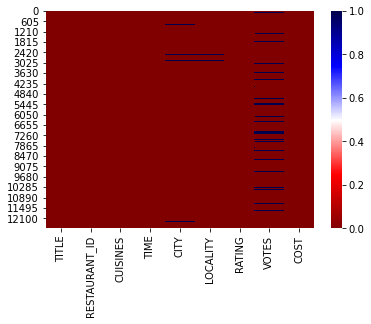

In [10]:
sns.heatmap(rt.isnull(),cmap='seismic_r')

In [11]:
#Checking for the null values
nulltrain=rt.isnull().sum().reset_index()
nulltest=rct.isnull().sum().reset_index()
null_tot=[nulltrain,nulltest]
a=pd.concat(null_tot,axis=1)
a.columns=['rt_col','total_null','rct_col','total_null']
a

,rt_col,total_null,rct_col,total_null
0,TITLE,0,TITLE,0.0
1,RESTAURANT_ID,0,RESTAURANT_ID,0.0
2,CUISINES,0,CUISINES,0.0
3,TIME,0,TIME,0.0
4,CITY,112,CITY,35.0
5,LOCALITY,98,LOCALITY,30.0
6,RATING,2,RATING,2.0
7,VOTES,1204,VOTES,402.0
8,COST,0,NaN,NaN


Observation:
1. In Train Data set columns- CITY,LOCALITY,RATING & VOTES has null values.
2. In Test Data set columns- CITY,LOCALITY,RATING & VOTES has null values.


In [12]:
#Lets remove null values from train dataset
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
imp=SimpleImputer(strategy='median')

In [13]:
rt['CITY']=si.fit_transform(rt['CITY'].values.reshape(-1,1))
rt['LOCALITY']=si.fit_transform(rt['LOCALITY'].values.reshape(-1,1))
rt['RATING']=si.fit_transform(rt['RATING'].values.reshape(-1,1))
rt['VOTES'].fillna('0 votes',inplace=True)

In [14]:
rt.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [15]:
rt['CITY'].value_counts()

Chennai         2286
Bangalore       2149
Hyderabad       1819
Mumbai          1722
New Delhi       1321
                ... 
Malad East         1
Khar (west)        1
Chenn ai           1
Dilsukhnagar       1
Saket              1
Name: CITY, Length: 359, dtype: int64

In [16]:
#Checking for the maximum titles that a restaurant holds.
max_rt=rt['TITLE'].apply(lambda x: len(x.split(',')))
print('Total maximum titles corresponding to a restaurant in train set is:', max_rt.max())

Total maximum titles corresponding to a restaurant in train set is: 2


In [17]:
#Checking for maximum cuisines that a restaurant offers.
cuisine_rt=rt['CUISINES'].apply(lambda x:len(x.split(',')))
print('Maximum number of cuisines offered by a restaurant in train data set is: ',cuisine_rt.max())

Maximum number of cuisines offered by a restaurant in train data set is:  8


In [18]:
#We will try to remove the inconsistency if any in the columns : TITLE and CUISINES so as to avoid more than one encoding for an entry.
import re
def srt(r):
    sort=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),r) 
    return ','.join(sorted(sort.lower().replace(' ','').split(',')))

In [19]:
rt['TITLE']=rt['TITLE'].apply(lambda x:srt(x))
rt['CUISINES']=rt['CUISINES'].apply(lambda x:srt(x))

In [20]:
#Lets make a list of all the occuring strings in the title and then encode them.
def titles(q):
    total=''
    for i in q:
        total+=i+','
    return total

In [21]:
#For train data
list=titles(rt['TITLE'])
list

'casualdining,bar,casualdining,casualdining,quickbites,dessertparlor,casualdining,café,microbrewery,quickbites,quickbites,casualdining,beverageshop,quickbites,casualdining,casualdining,quickbites,casualdining,iranicafe,casualdining,casualdining,casualdining,bakery,quickbites,casualdining,quickbites,none,casualdining,café,quickbites,casualdining,bar,casualdining,bar,pub,quickbites,café,café,quickbites,beverageshop,quickbites,quickbites,café,casualdining,quickbites,quickbites,quickbites,quickbites,quickbites,quickbites,casualdining,finedining,bar,casualdining,casualdining,dessertparlor,casualdining,café,casualdining,quickbites,quickbites,café,quickbites,quickbites,quickbites,casualdining,casualdining,casualdining,casualdining,quickbites,quickbites,beverageshop,dessertparlor,casualdining,quickbites,casualdining,casualdining,none,quickbites,sweetshop,quickbites,casualdining,quickbites,casualdining,dessertparlor,sweetshop,bakery,quickbites,beverageshop,quickbites,casualdining,quickbites,bak

In [22]:
from collections import Counter
count=pd.DataFrame.from_dict(dict(Counter(list.split(',')).most_common()),orient='index').reset_index()
count.columns=['Titles','Count']

In [23]:
count

,Titles,Count
0,quickbites,4598
1,casualdining,4379
2,none,1003
3,café,843
4,bar,682
5,dessertparlor,616
6,bakery,532
7,finedining,358
8,beverageshop,249
9,lounge,201


In [24]:
#lets encode the list corresponding to train dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
count['Codes']=le.fit_transform(count['Titles'].astype('str'))
count

,Titles,Count,Codes
0,quickbites,4598,23
1,casualdining,4379,5
2,none,1003,20
3,café,843,4
4,bar,682,2
5,dessertparlor,616,9
6,bakery,532,1
7,finedining,358,11
8,beverageshop,249,3
9,lounge,201,16


In [26]:
#Creating a dictionary for the titles and corresponding codes.
dict_title=dict(zip(count['Titles'],count['Codes']))
dict_title

{'quickbites': 23,
 'casualdining': 5,
 'none': 20,
 'café': 4,
 'bar': 2,
 'dessertparlor': 9,
 'bakery': 1,
 'finedining': 11,
 'beverageshop': 3,
 'lounge': 16,
 'sweetshop': 24,
 'pub': 22,
 'foodcourt': 12,
 'microbrewery': 19,
 'kiosk': 15,
 'mess': 18,
 'dhaba': 10,
 'foodtruck': 13,
 'club': 6,
 'cocktailbar': 7,
 'confectionery': 8,
 'paanshop': 21,
 'iranicafe': 14,
 'meatshop': 17,
 '': 0}

In [27]:
# For train data
list2=titles(rt['CUISINES'])
list2

'goan,malwani,northindian,asian,japanese,modernindian,biryani,chinese,hyderabadi,northindian,chinese,tibetan,desserts,biryani,chinese,northindian,seafood,burger,cafe,chinese,northindian,pizza,barfood,northindian,southindian,northindian,biryani,chinese,fastfood,northindian,beverages,burger,fastfood,arabian,mughlai,southindian,maharashtrian,hyderabadi,parsi,fastfood,northindian,chinese,hyderabadi,northindian,chinese,thai,bakery,fastfood,momos,continental,european,momos,northindian,rolls,fastfood,mughlai,northindian,rolls,andhra,biryani,chinese,northindian,cafe,chinese,italian,biryani,northindian,bbq,chinese,northindian,italian,continental,fingerfood,italian,northindian,asian,continental,fingerfood,northindian,northindian,southindian,cafe,tea,american,cafe,continental,european,healthyfood,chinese,northindian,southindian,beverages,coffee,tea,asian,chinese,fastfood,indonesian,korean,arabian,burger,cafe,healthyfood,continental,chinese,northindian,chinese,northindian,southindian,chinese,north

In [28]:
count2=pd.DataFrame.from_dict(dict(Counter(list2.split(',')).most_common()),orient='index').reset_index()
count2.columns=['cuisine','counts']
count2

,cuisine,counts
0,northindian,5383
1,chinese,4368
2,southindian,2274
3,fastfood,2121
4,continental,1563
...,...,...
120,jewish,1
121,vegan,1
122,oriental,1
123,modernaustralian,1


In [29]:
count2['cuisine_code']=le.fit_transform(count2['cuisine'].astype('str'))
count2

,cuisine,counts,cuisine_code
0,northindian,5383,86
1,chinese,4368,28
2,southindian,2274,110
3,fastfood,2121,39
4,continental,1563,31
...,...,...,...
120,jewish,1,59
121,vegan,1,122
122,oriental,1,87
123,modernaustralian,1,76


In [30]:
#Making a dictionary to dump cuisine name and corrresponding codes:
dict_cuisine=dict(zip(count2['cuisine'],count2['cuisine_code']))
dict_cuisine

{'northindian': 86,
 'chinese': 28,
 'southindian': 110,
 'fastfood': 39,
 'continental': 31,
 'biryani': 17,
 'desserts': 33,
 'italian': 57,
 'beverages': 15,
 'cafe': 23,
 'mughlai': 81,
 'streetfood': 114,
 'bakery': 10,
 'seafood': 106,
 'kerala': 63,
 'pizza': 95,
 'asian': 7,
 'arabian': 5,
 'momos': 78,
 'burger': 21,
 'icecream': 52,
 'thai': 119,
 'american': 3,
 'fingerfood': 40,
 'european': 38,
 'andhra': 4,
 'mexican': 73,
 'rolls': 101,
 'salad': 103,
 'sandwich': 104,
 'juices': 60,
 'kebab': 62,
 'healthyfood': 48,
 'mithai': 75,
 'bbq': 12,
 'lebanese': 66,
 'mediterranean': 72,
 'hyderabadi': 51,
 'japanese': 58,
 'chettinad': 27,
 '': 0,
 'bengali': 14,
 'maharashtrian': 68,
 'modernindian': 77,
 'mangalorean': 71,
 'tea': 117,
 'sushi': 115,
 'malwani': 70,
 'tibetan': 120,
 'rajasthani': 98,
 'coffee': 29,
 'gujarati': 47,
 'steak': 113,
 'malaysian': 69,
 'indian': 53,
 'korean': 65,
 'barfood': 11,
 'goan': 44,
 'wraps': 124,
 'vietnamese': 123,
 'burmese': 22,


Spliting title and cuisine into different columns

In [31]:
#For Title
for i in range(0,max_rt.max()):
    rt['TITLE'+str(i+1)]=rt['TITLE'].str.split(',').str[i]

In [32]:
#For cuisines
for i in range(0,cuisine_rt.max()):
    rt['CUISINE'+str(i+1)]=rt['CUISINES'].str.split(',').str[i]

In [33]:
rt

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,casualdining,NaN,goan,malwani,northindian,NaN,NaN,NaN,NaN,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,bar,casualdining,asian,japanese,modernindian,NaN,NaN,NaN,NaN,NaN
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,casualdining,NaN,biryani,chinese,hyderabadi,northindian,NaN,NaN,NaN,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,quickbites,NaN,chinese,tibetan,NaN,NaN,NaN,NaN,NaN,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,dessertparlor,NaN,desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,quickbites,NaN,burger,kebab,northindian,NaN,NaN,NaN,NaN,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,bar,casualdining,continental,goan,NaN,NaN,NaN,NaN,NaN,NaN
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,lounge,NaN,asian,chinese,continental,fingerfood,NaN,NaN,NaN,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,casualdining,NaN,chinese,northindian,southindian,streetfood,NaN,NaN,NaN,NaN


In [34]:
grp=['CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in grp:
    rt.replace({i:dict_cuisine},inplace=True)

In [35]:
rt

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,casualdining,NaN,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,bar,casualdining,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,casualdining,NaN,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,quickbites,NaN,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,dessertparlor,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,quickbites,NaN,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,bar,casualdining,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,lounge,NaN,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,casualdining,NaN,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN


In [36]:
group=['TITLE1','TITLE2']
for i in group:
     rt.replace({i:dict_title},inplace=True)

In [37]:
rt

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,5,NaN,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,2,5.0,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,5,NaN,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,23,NaN,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,9,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,23,NaN,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,2,5.0,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300,16,NaN,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,5,NaN,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN


In [38]:
# Votes are in object which is not a particular format it should provide us in integer data presenting count of votes.
# For Train data
rt['VOTES']=rt['VOTES'].str.rstrip('votes').astype('int')

In [39]:
rt

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,casualdining,9438,"goan,malwani,northindian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,5,NaN,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN
1,"bar,casualdining",13198,"asian,japanese,modernindian",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,2,5.0,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN
2,casualdining,10915,"biryani,chinese,hyderabadi,northindian","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,5,NaN,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN
3,quickbites,6346,"chinese,tibetan",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,23,NaN,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,dessertparlor,15387,desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,9,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,quickbites,13228,"burger,kebab,northindian","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500,23,NaN,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN
12686,"bar,casualdining",9686,"continental,goan","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800,2,5.0,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN
12687,lounge,11133,"asian,chinese,continental,fingerfood",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300,16,NaN,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN
12688,casualdining,6134,"chinese,northindian,southindian,streetfood",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400,5,NaN,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN


Dropping of columns:
1. Title  as we have split this column into 2 columns to make data more clear.
2. CUISINES as we have split into 8 coluumns.
3. TIME column is not in proper format, it is difficult to extract information from this column.

In [40]:
rt.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [41]:
rt

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,Thane,Dombivali East,3.6,49,1200,5,NaN,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN
1,13198,Chennai,Ramapuram,4.2,30,1500,2,5.0,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN
2,10915,Chennai,Saligramam,3.8,221,800,5,NaN,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN
3,6346,Mumbai,Bandra West,4.1,24,800,23,NaN,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,15387,Mumbai,Lower Parel,3.8,165,300,9,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546,500,23,NaN,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214,1800,2,5.0,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN
12687,11133,Navi Mumbai,Vashi,4.0,608,1300,16,NaN,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN
12688,6134,Chennai,Maduravoyal,3.5,32,400,5,NaN,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN


In [42]:
#Giving codes to columns CITY,LOCALITY.
rt['CITY']=le.fit_transform(rt['CITY'].astype('str'))
rt['LOCALITY']=le.fit_transform(rt['LOCALITY'].astype('str'))

In [43]:
rt

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,320,285,3.6,49,1200,5,NaN,44,70.0,86.0,NaN,NaN,NaN,NaN,NaN
1,13198,67,1046,4.2,30,1500,2,5.0,7,58.0,77.0,NaN,NaN,NaN,NaN,NaN
2,10915,67,1101,3.8,221,800,5,NaN,17,28.0,51.0,86.0,NaN,NaN,NaN,NaN
3,6346,222,136,4.1,24,800,23,NaN,28,120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,15387,222,620,3.8,165,300,9,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,546,500,23,NaN,21,62.0,86.0,NaN,NaN,NaN,NaN,NaN
12686,9686,222,133,4.3,1214,1800,2,5.0,31,44.0,NaN,NaN,NaN,NaN,NaN,NaN
12687,11133,239,1342,4.0,608,1300,16,NaN,7,28.0,31.0,40.0,NaN,NaN,NaN,NaN
12688,6134,67,631,3.5,32,400,5,NaN,28,86.0,110.0,114.0,NaN,NaN,NaN,NaN


In [44]:
#Filling the null values present in train data with -1.
rt.fillna(-1,inplace=True)

In [45]:
rt

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,320,285,3.6,49,1200,5,-1.0,44,70.0,86.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,13198,67,1046,4.2,30,1500,2,5.0,7,58.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,10915,67,1101,3.8,221,800,5,-1.0,17,28.0,51.0,86.0,-1.0,-1.0,-1.0,-1.0
3,6346,222,136,4.1,24,800,23,-1.0,28,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,15387,222,620,3.8,165,300,9,-1.0,33,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,546,500,23,-1.0,21,62.0,86.0,-1.0,-1.0,-1.0,-1.0,-1.0
12686,9686,222,133,4.3,1214,1800,2,5.0,31,44.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12687,11133,239,1342,4.0,608,1300,16,-1.0,7,28.0,31.0,40.0,-1.0,-1.0,-1.0,-1.0
12688,6134,67,631,3.5,32,400,5,-1.0,28,86.0,110.0,114.0,-1.0,-1.0,-1.0,-1.0


In [46]:
rt.dtypes

RESTAURANT_ID      int64
CITY               int32
LOCALITY           int32
RATING            object
VOTES              int32
COST               int64
TITLE1             int64
TITLE2           float64
CUISINE1           int64
CUISINE2         float64
CUISINE3         float64
CUISINE4         float64
CUISINE5         float64
CUISINE6         float64
CUISINE7         float64
CUISINE8         float64
dtype: object

In [47]:
#rating showing as object type column.

In [48]:
rt['RATING'].value_counts()

3.9    1240
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [49]:
#As we can see the presence of NEW and - in the entries of RATING. Lets replace these with 0.
rt['RATING']=rt["RATING"].str.replace(r"(NEW)", "0.0").str.replace("-","0.0")

In [50]:
rt['RATING'].value_counts()

3.9    1240
0.0    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

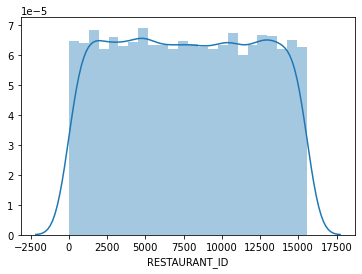

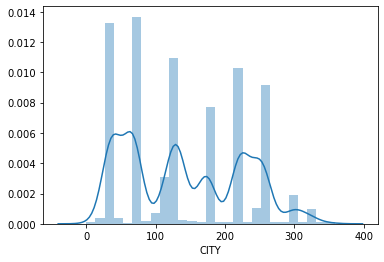

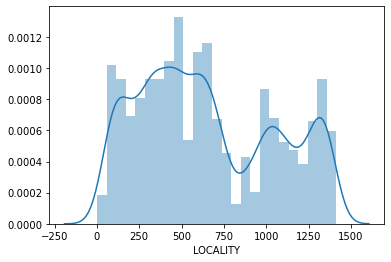

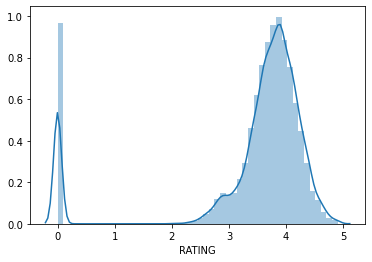

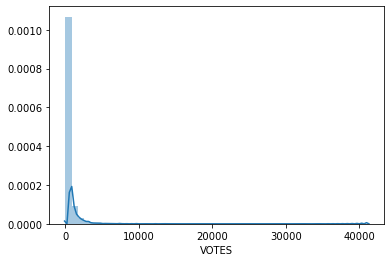

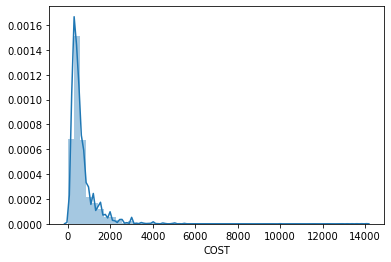

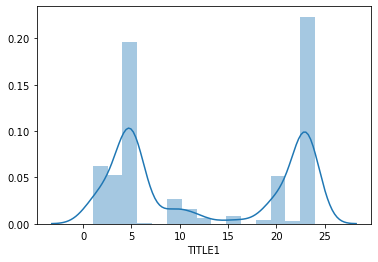

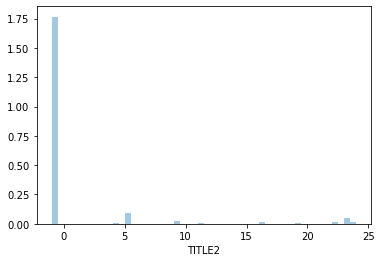

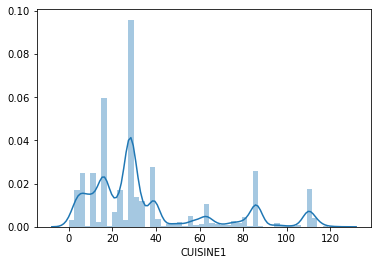

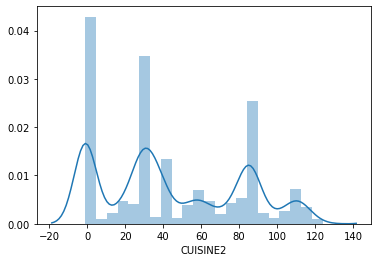

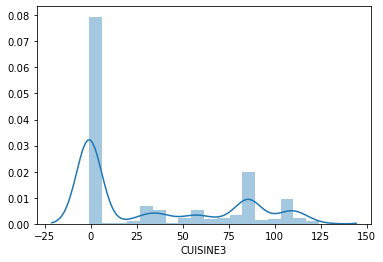

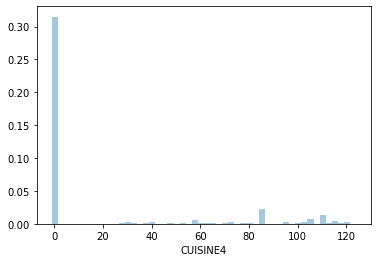

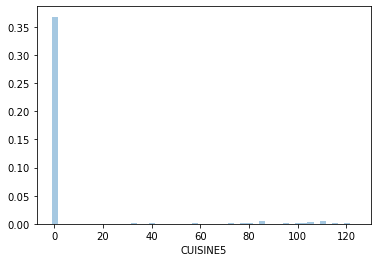

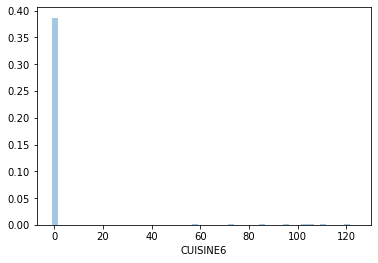

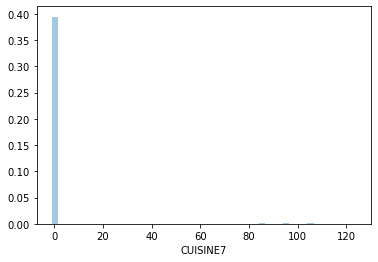

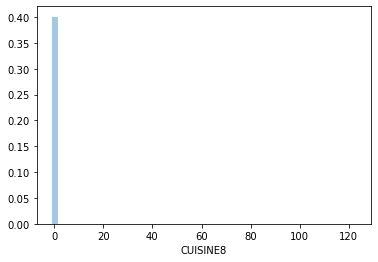

In [51]:
#Lets see the distribution and skewness of the train data set using distplot
for i in rt.columns:
    sns.distplot(rt[i])
    plt.show()

Observations:

1. We see left skewness in columns RATING
2. Right skewness in columns: VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8.
3. RESTAURANT_ID Column is spread between 0-15250 approx.
4. City is spread from 0-400.
5. Locality is spread from 0-1500.
6. Rating is spread form 0-5.
7. VOTES  is spread between 0-5000 aprrox.
8. COST is spread between 0-14000 with maximum occuring from 0-4000.
9. TITLE is spread from 0-25.

In [52]:
rt.describe()

,RESTAURANT_ID,CITY,LOCALITY,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,142.281403,652.391568,376.231127,655.252246,12.616154,0.604492,35.595508,44.169819,33.189756,17.296454,6.170292,2.004886,0.332230,-0.372183
std,4504.874150,83.921428,399.116379,810.946942,627.003540,8.838733,5.214721,28.926566,36.754035,42.217895,37.108917,25.334271,16.895920,11.470794,8.123753
min,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3863.250000,67.000000,337.000000,39.250000,300.000000,5.000000,-1.000000,17.000000,12.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,7740.000000,131.000000,582.000000,132.000000,500.000000,9.000000,-1.000000,28.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,11688.750000,222.000000,1009.000000,405.000000,800.000000,23.000000,-1.000000,39.000000,81.000000,81.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,15573.000000,358.000000,1415.000000,41186.000000,14000.000000,24.000000,24.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,123.000000


Observations:
1. Count for every column is 12690.000000.
2. Standard Deviation of columns RESTAURANT_ID,LOCALITY,VOTES,COST is quite high.
3. Great difference is seen between the 75th% and max in columns: VOTES,COST,CUISINE1,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE2  indicates the presence of outliers.

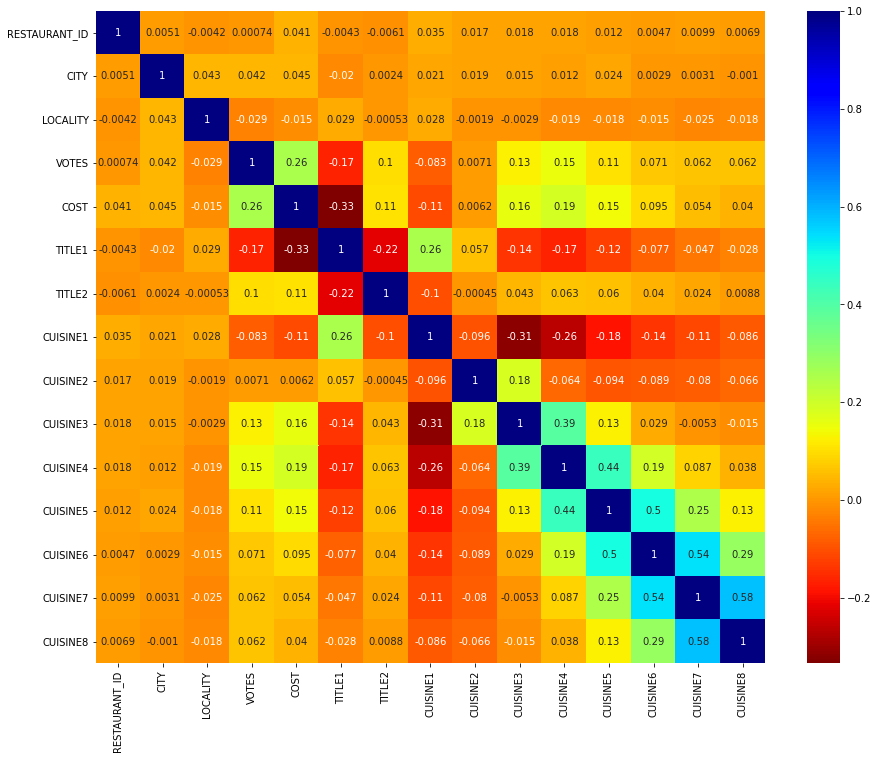

In [53]:
# lets plot correlation with the help of Heatmap

plt.figure(figsize=(15,12))
sns.heatmap(rt.corr(),annot=True,cmap='jet_r')

Observations:

1. Target variable COST is negatively correlated with TITLE1.
2. CUISINE3 is negatively correlated with CUISINE1.
3. LOCALITY and VOTES  is negatively correlated.
4. CUISINE5 and CUISINE6, CUISINE6 and CUISINE7, CUISINE7 and CUISINE8 are not strongly but positively correlated.

In [54]:
#Lets check the skewness of the data
rt.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -2.216295
VOTES            14.522617
COST              3.978801
TITLE1            0.145007
TITLE2            3.562446
CUISINE1          1.306230
CUISINE2          0.332172
CUISINE3          0.677859
CUISINE4          1.693948
CUISINE5          3.441546
CUISINE6          5.692530
CUISINE7          8.760835
CUISINE8         13.077487
dtype: float64

In [55]:
#Removing the skewness using Power Transformer.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [56]:
for i in rt.skew().index[0:-1]:
    if rt.skew().loc[i]>0.55:
        rt[i]=pt.fit_transform(rt[i].values.reshape(-1,1))
    else:
        rt[i]=rt[i]

In [57]:
rt.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -2.216295
VOTES            -0.025811
COST              0.000538
TITLE1            0.145007
TITLE2            2.386753
CUISINE1         -0.002819
CUISINE2          0.332172
CUISINE3          0.240271
CUISINE4          1.407233
CUISINE5          3.097042
CUISINE6          5.262361
CUISINE7          8.314606
CUISINE8         13.077487
dtype: float64

In [58]:
rt['RATING']=rt['RATING'].astype('float')

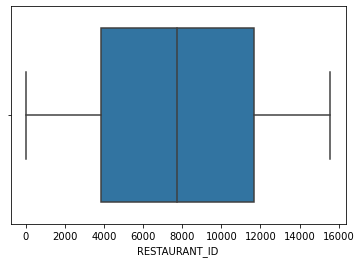

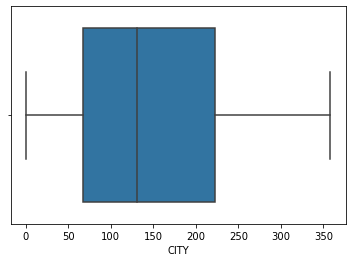

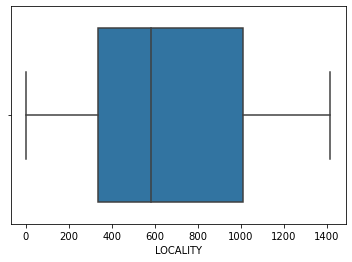

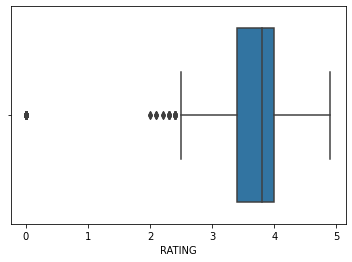

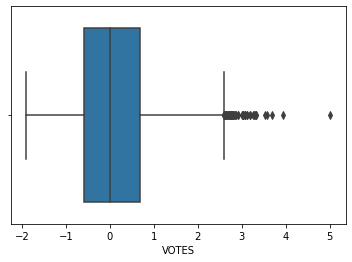

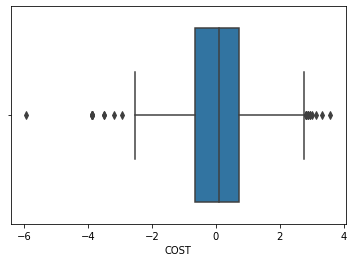

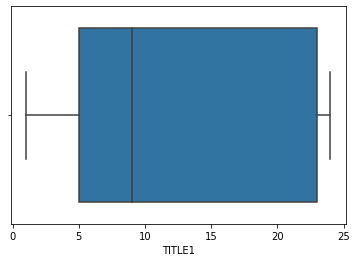

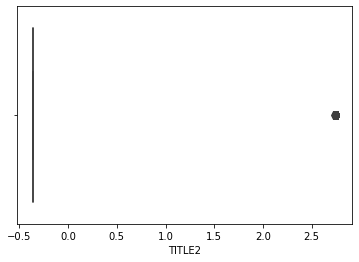

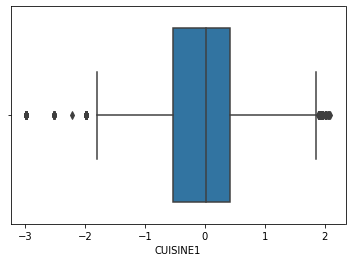

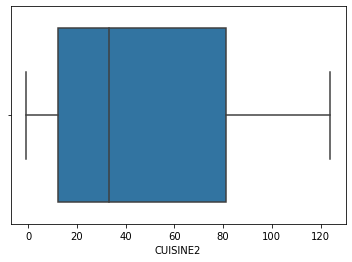

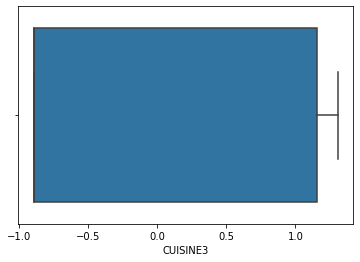

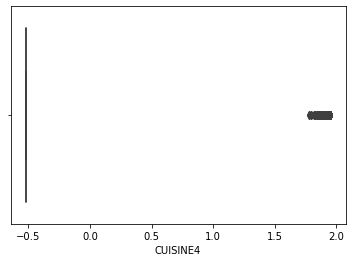

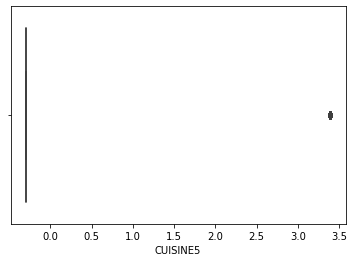

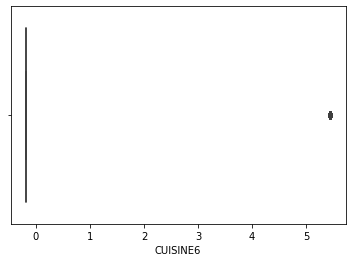

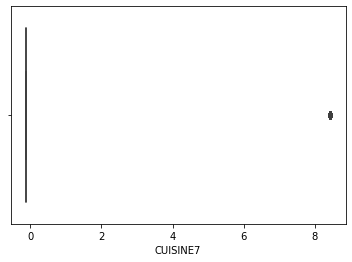

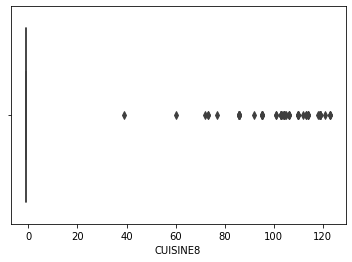

In [59]:
# Checking presence of ouliers
for i in rt.columns:
    sns.boxplot(rt[i])
    plt.show()

In [60]:
#Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(rt))

In [61]:
restro=rt[(z<3).all(axis=1)]
restro

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,320,285,3.6,-0.499292,1.219366,5,-0.363628,0.578469,70.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
1,13198,67,1046,4.2,-0.719411,1.480024,2,2.739962,-1.376007,58.0,1.141557,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
2,10915,67,1101,3.8,0.297233,0.717621,5,-0.363628,-0.541506,28.0,0.997972,1.932122,-0.294852,-0.183642,-0.118593,-1.0
3,6346,222,136,4.1,-0.813453,0.717621,23,-0.363628,0.015948,120.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
4,15387,222,620,3.8,0.127686,-0.660934,9,-0.363628,0.213945,-1.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,0.872552,0.087605,23,-0.363628,-0.313378,62.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
12686,9686,222,133,4.3,1.450483,1.685227,2,2.739962,0.137743,44.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
12687,11133,239,1342,4.0,0.946357,1.314092,16,-0.363628,-1.376007,28.0,0.826551,1.879827,-0.294852,-0.183642,-0.118593,-1.0
12688,6134,67,631,3.5,-0.691508,-0.230885,5,-0.363628,0.015948,86.0,1.266814,1.946533,-0.294852,-0.183642,-0.118593,-1.0


In [62]:
print('Shape before removing outliers: ',rt.shape,'\nShape after removing outliers: ',restro.shape)

Shape before removing outliers:  (12690, 16) 
Shape after removing outliers:  (11640, 16)


In [63]:
restro.skew()

RESTAURANT_ID    0.011778
CITY             0.283760
LOCALITY         0.344817
RATING          -2.155928
VOTES           -0.058816
COST             0.106454
TITLE1           0.069649
TITLE2           2.565844
CUISINE1         0.098592
CUISINE2         0.245967
CUISINE3         0.428750
CUISINE4         2.037557
CUISINE5         0.000000
CUISINE6         0.000000
CUISINE7         0.000000
CUISINE8         0.000000
dtype: float64

In [64]:
#Splitting the data into x_train and y_train
x=restro.drop(['COST'],axis=1)
y=restro['COST']

In [65]:
x

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,320,285,3.6,-0.499292,5,-0.363628,0.578469,70.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
1,13198,67,1046,4.2,-0.719411,2,2.739962,-1.376007,58.0,1.141557,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
2,10915,67,1101,3.8,0.297233,5,-0.363628,-0.541506,28.0,0.997972,1.932122,-0.294852,-0.183642,-0.118593,-1.0
3,6346,222,136,4.1,-0.813453,23,-0.363628,0.015948,120.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
4,15387,222,620,3.8,0.127686,9,-0.363628,0.213945,-1.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,131,342,3.8,0.872552,23,-0.363628,-0.313378,62.0,1.180293,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
12686,9686,222,133,4.3,1.450483,2,2.739962,0.137743,44.0,-0.896433,-0.519226,-0.294852,-0.183642,-0.118593,-1.0
12687,11133,239,1342,4.0,0.946357,16,-0.363628,-1.376007,28.0,0.826551,1.879827,-0.294852,-0.183642,-0.118593,-1.0
12688,6134,67,631,3.5,-0.691508,5,-0.363628,0.015948,86.0,1.266814,1.946533,-0.294852,-0.183642,-0.118593,-1.0


In [66]:
y=restro['COST']
y

0        1.219366
1        1.480024
2        0.717621
3        0.717621
4       -0.660934
           ...   
12685    0.087605
12686    1.685227
12687    1.314092
12688   -0.230885
12689    0.338419
Name: COST, Length: 11640, dtype: float64

In [67]:
# Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
mnm=MinMaxScaler()

In [68]:
x2=mnm.fit_transform(x)
x=pd.DataFrame(x2,columns=x.columns)
x

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,0.606049,0.893855,0.201413,0.734694,0.292760,0.173913,0.000000,0.672010,0.568,0.941619,0.000000,0.0,0.0,0.0,0.0
1,0.847492,0.187151,0.739223,0.857143,0.247174,0.043478,0.993418,0.248792,0.472,0.924056,0.000000,0.0,0.0,0.0,0.0
2,0.700893,0.187151,0.778092,0.775510,0.457718,0.173913,0.000000,0.429493,0.232,0.858952,0.992591,0.0,0.0,0.0,0.0
3,0.407500,0.620112,0.096113,0.836735,0.227699,0.956522,0.000000,0.550203,0.968,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.988056,0.620112,0.438163,0.775510,0.422605,0.347826,0.000000,0.593077,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,0.849419,0.365922,0.241696,0.775510,0.576864,0.956522,0.000000,0.478892,0.504,0.941619,0.000000,0.0,0.0,0.0,0.0
11636,0.621974,0.620112,0.093993,0.877551,0.696551,0.043478,0.993418,0.576576,0.360,0.000000,0.000000,0.0,0.0,0.0,0.0
11637,0.714891,0.667598,0.948410,0.816327,0.592149,0.652174,0.000000,0.248792,0.232,0.781227,0.971417,0.0,0.0,0.0,0.0
11638,0.393887,0.187151,0.445936,0.714286,0.252953,0.173913,0.000000,0.550203,0.696,0.980849,0.998427,0.0,0.0,0.0,0.0


In [69]:
#Fitting the Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
list=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]
for j in list:
    print('For the algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=70)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    r2=r2_score(pred,y_test)
    print('Score is:',j.score(x_train,y_train))
    print('r2 score is: ',r2)
    print('Mean absolute error is: ',mean_absolute_error(pred,y_test))
    print('Mean squared error:',mean_squared_error(pred,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(pred,y_test)))
    print("✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦")
    print('\n')

For the algorithm:  LinearRegression()
Score is: 0.34182046220635875
r2 score is:  -0.7899720046925154
Mean absolute error is:  0.6035787847191095
Mean squared error: 0.6250074354706376
Root mean squared error:  0.7905741176326465
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  SVR()
Score is: 0.45360416571992246
r2 score is:  -0.30833318296404433
Mean absolute error is:  0.5560395372292297
Mean squared error: 0.5405980085795801
Root mean squared error:  0.7352537035470003
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  DecisionTreeRegressor()
Score is: 1.0
r2 score is:  0.4007080546236146
Mean absolute error is:  0.5928046528734463
Mean squared error: 0.603213327173275
Root mean squared error:  0.7766680933148181
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  KNeighborsRegressor()
Score is: 0.596083823660154
r2 score is:  -0.1225119078605994
Mean absolute error is:  0.5741961843038476
Mean squared error: 0.5766675425663249
Root mean squared error:  0.759386293375331

In [70]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
list=[RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),Ridge(),Lasso(),ElasticNet()]
for j in list:
    print('for the algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=70)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    r2=r2_score(pred,y_test)
    print('Score is:',j.score(x_train,y_train))
    print('r2 score is: ',r2)
    print('Mean absolute error is: ',mean_absolute_error(pred,y_test))
    print('Mean squared error:',mean_squared_error(pred,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(pred,y_test)))
    print("✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦")
    print('\n')

for the algorithm:  RandomForestRegressor()
Score is: 0.9532207231692521
r2 score is:  0.5550538197982644
Mean absolute error is:  0.42653270100185076
Mean squared error: 0.3062927745164582
Root mean squared error:  0.5534372362937446
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


for the algorithm:  GradientBoostingRegressor()
Score is: 0.6647322933903992
r2 score is:  0.43270862704724933
Mean absolute error is:  0.4405238060170781
Mean squared error: 0.32657581125223034
Root mean squared error:  0.5714681191914649
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


for the algorithm:  AdaBoostRegressor()
Score is: 0.44331336745719285
r2 score is:  -0.70443277423339
Mean absolute error is:  0.5766912878737936
Mean squared error: 0.5443106674089054
Root mean squared error:  0.7377741303467514
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


for the algorithm:  Ridge()
Score is: 0.34181791767335157
r2 score is:  -0.7949598261286361
Mean absolute error is:  0.6035779421901655
Mean squared error: 0.6250117449086673
Root mean squared 

In [71]:
rf=RandomForestRegressor()
for i in range(33,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    r2=r2_score(pred,y_test)
    print('R2 score corresponding to is: ',r2,'for:',i)
     
       

R2 score corresponding to is:  0.5282624346135694 for: 33
R2 score corresponding to is:  0.4804058574718697 for: 34
R2 score corresponding to is:  0.5280366422389808 for: 35
R2 score corresponding to is:  0.49826113009938755 for: 36
R2 score corresponding to is:  0.5317361639838409 for: 37
R2 score corresponding to is:  0.48757592826408336 for: 38
R2 score corresponding to is:  0.531729492439242 for: 39
R2 score corresponding to is:  0.5318123992690098 for: 40
R2 score corresponding to is:  0.5204094078378559 for: 41
R2 score corresponding to is:  0.4950740105057414 for: 42
R2 score corresponding to is:  0.5134645589253048 for: 43
R2 score corresponding to is:  0.48736125482577686 for: 44
R2 score corresponding to is:  0.4507179597462273 for: 45
R2 score corresponding to is:  0.5109734339384998 for: 46
R2 score corresponding to is:  0.4901617764704215 for: 47
R2 score corresponding to is:  0.5339179719192124 for: 48
R2 score corresponding to is:  0.5180718473413667 for: 49
R2 score cor

In [72]:
# Best r2 score for random state 70  

In [74]:
#Finding the Best parameters for RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params={'criterion':['mse','mae']}
rff=RandomForestRegressor()
gd=GridSearchCV(rff,params)
gd.fit(x,y)
gd.best_params_

{'criterion': 'mse'}

In [75]:
#Cross Validation for random forest regressor
from sklearn.model_selection import cross_val_score
rff=RandomForestRegressor(criterion='mse',random_state=70)
score=cross_val_score(rf,x,y,cv=3,scoring='r2')
print('Score: ',score)
print('Mean Score: ',score.mean())
print('Standard Deviation: ',score.std())

Score:  [0.65796688 0.66639643 0.67889938]
Mean Score:  0.6677542292702819
Standard Deviation:  0.008599423201296122


Working on the best model i.e, Random forest regressor as it has the highest r2 score and the errors are low. Also it does not overfit easily.

In [76]:
rfr=RandomForestRegressor(criterion='mse',n_estimators=20,random_state=54)
rfr.fit(x_train,y_train)
print('Score of random forest is:',rfr.score(x_train,y_train))
predict=rfr.predict(x_test)
print('Mean absolute error: ',mean_absolute_error(y_test,predict))
print('Mean squared error: ',mean_squared_error(y_test,predict))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 score: ',r2_score(y_test,predict))

Score of random forest is: 0.9458782154973735
Mean absolute error:  0.44625697580233903
Mean squared error:  0.33775166109192495
Root mean squared error: 0.5811640569511547
R2 score:  0.6519914002926809


In [77]:
#Saving the model-Random forest regressor
import joblib
joblib.dump(rfr,'restaurant.pkl')

['restaurant.pkl']

# TEST DATA

In [78]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [79]:
rct.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [80]:
#Checking for the maximum titles that a restaurant holds.
max_rct=rct['TITLE'].apply(lambda x: len(x.split(',')))
print('Total maximum titles corresponding to a restaurant in train set is:', max_rct.max())

Total maximum titles corresponding to a restaurant in train set is: 2


In [81]:
#Checking for maximum cuisines that a restaurant offers.
cuisine_rct=rct['CUISINES'].apply(lambda x:len(x.split(',')))
print('Maximum number of cuisines offered by a restaurant in train data set is: ',cuisine_rt.max())

Maximum number of cuisines offered by a restaurant in train data set is:  8


In [83]:
#Removing null values from the test dataset
rct['CITY']=si.fit_transform(rct['CITY'].values.reshape(-1,1))
rct['LOCALITY']=si.fit_transform(rct['LOCALITY'].values.reshape(-1,1))
rct['RATING']=si.fit_transform(rct['RATING'].values.reshape(-1,1))
rct['VOTES'].fillna('0 votes',inplace=True)

In [84]:
rct.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [85]:
rct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4231 non-null   object
 5   LOCALITY       4231 non-null   object
 6   RATING         4231 non-null   object
 7   VOTES          4231 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [86]:
#We will try to remove the inconsistency if any in the columns : TITLE and CUISINES so as to avoid more than one encoding for an entry.
#Using the function:
#def srt(r):
#    sort=re.sub(r'\([^()]+\)',lambda x:x.group().replace(',','-'),r) 
#    return ','.join(sorted(sort.lower().replace(' ','').split(',')))

In [87]:
rct['TITLE']=rct['TITLE'].apply(lambda x:srt(x))
rct['CUISINES']=rct['CUISINES'].apply(lambda x:srt(x))

In [88]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes


In [90]:
#Making the list of all the Titles of the test dataset.
#Using the function
#def titles(q):
#    total=''
#    for i in q:
#        total+=i+','
#    return total
#
list3=titles(rct['TITLE'])

In [91]:
#Counting all the unique entries.
count3=pd.DataFrame.from_dict(dict(Counter(list3.split(',')).most_common()),orient='index').reset_index()
count3.columns=['Titles','Count']

In [92]:
count3

,Titles,Count
0,quickbites,1546
1,casualdining,1486
2,café,297
3,none,284
4,bar,218
5,dessertparlor,179
6,bakery,175
7,finedining,110
8,beverageshop,82
9,sweetshop,63


In [93]:
#Label Encoding the column Titles
count3['Codes']=le.fit_transform(count3['Titles'].astype('str'))
count3

,Titles,Count,Codes
0,quickbites,1546,24
1,casualdining,1486,6
2,café,297,5
3,none,284,21
4,bar,218,2
5,dessertparlor,179,10
6,bakery,175,1
7,finedining,110,12
8,beverageshop,82,3
9,sweetshop,63,25


In [95]:
#Creating a dictionary for the titles and corresponding codes. This dictionary would be used to encode further.
dict_rct=dict(zip(count3['Titles'],count3['Codes']))
dict_rct

{'quickbites': 24,
 'casualdining': 6,
 'café': 5,
 'none': 21,
 'bar': 2,
 'dessertparlor': 10,
 'bakery': 1,
 'finedining': 12,
 'beverageshop': 3,
 'sweetshop': 25,
 'lounge': 17,
 'pub': 23,
 'foodcourt': 13,
 'microbrewery': 20,
 'kiosk': 16,
 'dhaba': 11,
 'mess': 19,
 'club': 7,
 'foodtruck': 14,
 'iranicafe': 15,
 'cocktailbar': 8,
 'meatshop': 18,
 'confectionery': 9,
 'paanshop': 22,
 'bhojanalya': 4,
 '': 0}

In [96]:
#For test data, making list of cuisines
list3=titles(rct['CUISINES'])
list3

'chinese,kebab,mughlai,northindian,fastfood,northindian,pizza,southindian,biryani,chinese,northindian,seafood,biryani,kerala,southindian,desserts,icecream,fastfood,northindian,streetfood,biryani,chinese,chinese,fastfood,northindian,pizza,northindian,desserts,fastfood,chinese,northindian,southindian,streetfood,french,chinese,continental,fingerfood,chinese,continental,northindian,bbq,biryani,continental,chinese,fastfood,rolls,streetfood,chinese,fastfood,momos,southindian,beverages,icecream,chinese,fastfood,northindian,southindian,northindian,southindian,american,chinese,desserts,italian,mexican,northindian,chinese,northindian,andhra,biryani,northindian,beverages,desserts,icecream,italian,continental,italian,biryani,kerala,northindian,southindian,chinese,northindian,southindian,american,asian,european,northindian,mughlai,northindian,northindian,chinese,continental,kerala,southindian,cafe,chinese,continental,northindian,asian,fastfood,kerala,bakery,asian,continental,european,mediterranean,

In [97]:
#Counting all the unique entries.
count3=pd.DataFrame.from_dict(dict(Counter(list3.split(',')).most_common()),orient='index').reset_index()
count3.columns=['Cuisine','Count']

In [98]:
count3

,Cuisine,Count
0,northindian,1839
1,chinese,1481
2,southindian,760
3,fastfood,745
4,continental,532
...,...,...
107,cuisinevaries,1
108,naga,1
109,oriental,1
110,vegan,1


In [99]:
#Label Encoding the column Titles
count3['Codes']=le.fit_transform(count3['Cuisine'].astype('str'))
count3

,Cuisine,Count,Codes
0,northindian,1839,78
1,chinese,1481,26
2,southindian,760,97
3,fastfood,745,35
4,continental,532,28
...,...,...,...
107,cuisinevaries,1,29
108,naga,1,75
109,oriental,1,79
110,vegan,1,109


In [100]:
#Creating a dictionary for the cuisine and corresponding codes. This dictionary would be used to encode further.
cuisine_test=dict(zip(count3['Cuisine'],count3['Codes']))
cuisine_test

{'northindian': 78,
 'chinese': 26,
 'southindian': 97,
 'fastfood': 35,
 'continental': 28,
 'biryani': 15,
 'italian': 51,
 'desserts': 30,
 'beverages': 13,
 'cafe': 21,
 'mughlai': 74,
 'bakery': 9,
 'streetfood': 101,
 'kerala': 56,
 'pizza': 85,
 'seafood': 93,
 'asian': 6,
 'arabian': 5,
 'burger': 19,
 'momos': 71,
 'icecream': 47,
 'thai': 106,
 'rolls': 90,
 'fingerfood': 36,
 'mexican': 66,
 'juices': 53,
 'salad': 91,
 'american': 3,
 'kebab': 55,
 'sandwich': 92,
 'andhra': 4,
 'healthyfood': 45,
 'mithai': 69,
 'european': 33,
 'japanese': 52,
 'lebanese': 59,
 'mediterranean': 65,
 '': 0,
 'bbq': 11,
 'hyderabadi': 46,
 'bengali': 12,
 'chettinad': 25,
 'sushi': 102,
 'malwani': 63,
 'tea': 104,
 'coffee': 27,
 'modernindian': 70,
 'indian': 48,
 'maharashtrian': 61,
 'french': 38,
 'tibetan': 107,
 'steak': 100,
 'mangalorean': 64,
 'barfood': 10,
 'vietnamese': 110,
 'korean': 58,
 'parsi': 84,
 'afghan': 1,
 'middleeastern': 67,
 'wraps': 111,
 'malaysian': 62,
 'goan

In [104]:
#Splitting title in test data 
#For title
for i in range(0,max_rct.max()):
    rct['TITLE'+str(i+1)] =rct['TITLE'].str.split(',').str[i]

In [105]:
#Splitting cuisine in test data
for i in range(0,cuisine_rct.max()):
    rct['CUISINE'+str(i+1)]=rct['CUISINES'].str.split(',').str[i]

In [106]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,chinese,kebab,mughlai,northindian,NaN,NaN,NaN,NaN,casualdining,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,fastfood,northindian,pizza,southindian,NaN,NaN,NaN,NaN,quickbites,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,biryani,chinese,northindian,seafood,NaN,NaN,NaN,NaN,casualdining,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,biryani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,kerala,southindian,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,chinese,mughlai,northindian,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,biryani,northindian,salad,sandwich,wraps,NaN,NaN,NaN,none,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,continental,northindian,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,beverages,rolls,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN


In [108]:
#Encoding all the columns of cuisine now using dictionary cuis_test
grp=['CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in grp:
    rct.replace({i:cuisine_test},inplace=True)

In [109]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,casualdining,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,quickbites,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,casualdining,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,casualdining,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,none,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,quickbites,NaN


In [112]:
#Encoding title1 and title2 using dictionary dict_test
grps=['TITLE1','TITLE2']
for i in grps:
     rct.replace({i:dict_rct},inplace=True)

In [113]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0 votes,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [115]:
#Lets remove the string 'votes' from the column votes and covert the column to int type.
rct['VOTES']=rct['VOTES'].str.rstrip('votes').astype('int')

In [116]:
rct

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,casualdining,4085,"chinese,kebab,mughlai,northindian",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,quickbites,12680,"fastfood,northindian,pizza,southindian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,casualdining,1411,"biryani,chinese,northindian,seafood",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,none,204,biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,quickbites,13453,"kerala,southindian",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,casualdining,9057,"chinese,mughlai,northindian",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,none,1247,"biryani,northindian,salad,sandwich,wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,quickbites,8617,"continental,northindian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,quickbites,6485,"beverages,rolls","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


NOtes:
Dropping the columns:

TITLE as we have split this column into two columns to make data more informative.
CUISINES as we have split cuisine column too.
TIME column is not in proper format, it is difficult to extract information from this column.

In [117]:
rct.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [118]:
rct

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,Noida,Sector 18,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,12680,Mumbai,Grant Road,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,1411,Mumbai,Marine Lines,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,204,Faridabad,NIT,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,13453,Kochi,Kaloor,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,New Delhi,Punjabi Bagh,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,1247,Bangalore,HSR Layout,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,8617,Faridabad,Sector 86,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,6485,Kochi,Kochi,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [121]:
#Label Encoding CITY and LOCALITY
rct['CITY']=le.fit_transform(rct["CITY"].astype('str'))
rct['LOCALITY']=le.fit_transform(rct['LOCALITY'].astype('str'))

In [122]:
rct

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,4.3,564,26,55.0,74.0,78.0,NaN,NaN,NaN,NaN,6,NaN
1,12680,96,221,4.2,61,35,78.0,85.0,97.0,NaN,NaN,NaN,NaN,24,NaN
2,1411,96,411,3.8,350,15,26.0,78.0,93.0,NaN,NaN,NaN,NaN,6,NaN
3,204,41,456,3.8,1445,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
4,13453,78,300,3.6,23,56,97.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.9,287,26,74.0,78.0,NaN,NaN,NaN,NaN,NaN,6,NaN
4227,1247,9,237,4.3,469,15,78.0,91.0,92.0,111.0,NaN,NaN,NaN,21,NaN
4228,8617,41,696,3.7,53,28,78.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
4229,6485,78,332,-,0,13,90.0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN


In [123]:
#Filling null values in the test data set using -1 not 0 as we have previously used 0 to fill the null values of column votes.
rct.fillna(-1,inplace=True)

In [124]:
rct

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,4.3,564,26,55.0,74.0,78.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
1,12680,96,221,4.2,61,35,78.0,85.0,97.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
2,1411,96,411,3.8,350,15,26.0,78.0,93.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
3,204,41,456,3.8,1445,15,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21,-1.0
4,13453,78,300,3.6,23,56,97.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9057,108,597,3.9,287,26,74.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,6,-1.0
4227,1247,9,237,4.3,469,15,78.0,91.0,92.0,111.0,-1.0,-1.0,-1.0,21,-1.0
4228,8617,41,696,3.7,53,28,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0
4229,6485,78,332,-,0,13,90.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24,-1.0


In [125]:
rct['RATING'].value_counts()

3.8    416
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [131]:
rct['RATING']=rt['RATING'].astype('float')

In [132]:
rct.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000
mean,7791.438431,58.278658,383.368944,3.432782,388.935713,32.090522,40.191444,29.440558,15.688017,5.797447,1.618530,0.543843,-0.347908,13.451903,0.619948
std,4458.797621,38.707396,234.889944,1.173172,800.940258,25.590309,32.733059,37.527556,33.397067,23.300470,14.717211,11.816701,7.685205,9.003072,5.392466
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,3908.500000,18.000000,192.000000,3.400000,42.000000,15.000000,13.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,-1.000000
50%,7798.000000,55.000000,350.000000,3.800000,134.000000,26.000000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,10.000000,-1.000000
75%,11634.000000,96.000000,581.500000,4.000000,422.500000,35.000000,78.000000,74.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,24.000000,-1.000000
max,15572.000000,150.000000,833.000000,4.900000,15205.000000,110.000000,111.000000,110.000000,111.000000,111.000000,110.000000,111.000000,108.000000,25.000000,25.000000


In [133]:
rct.skew()

RESTAURANT_ID     0.006586
CITY              0.086664
LOCALITY          0.313354
RATING           -2.238180
VOTES             7.049220
CUISINE1          1.262722
CUISINE2          0.271011
CUISINE3          0.671085
CUISINE4          1.651396
CUISINE5          3.315699
CUISINE6          5.675601
CUISINE7          7.748809
CUISINE8         11.925797
TITLE1            0.135224
TITLE2            3.632166
dtype: float64

In [134]:
#Removing skewness for test data
for i in rct.skew().index:
    if rct.skew().loc[i]>0.55:
        rct[i]=pt.fit_transform(rct[i].values.reshape(-1,1))
    if rct.skew().loc[i]<-0.55:
        rct[i]=pt.fit_transform(rct[i].values.reshape(-1,1))
    else:
        rct[i]=rct[i]

In [135]:
rct.skew()

RESTAURANT_ID     0.006586
CITY              0.086664
LOCALITY          0.313354
RATING           -0.784520
VOTES            -0.027389
CUISINE1         -0.003987
CUISINE2          0.271011
CUISINE3          0.239507
CUISINE4          1.376132
CUISINE5          2.997178
CUISINE6          5.285497
CUISINE7          7.364233
CUISINE8         11.557939
TITLE1            0.135224
TITLE2            2.507021
dtype: float64

In [138]:
#Removing outliers using zscore
#Threshold=3
z=np.abs(zscore(rct))
test_new=rct[(z<3).all(axis=1)]
print('Before removing outliers shape was: ',rct.shape,'\tAfter removing outliers shape is: ',test_new.shape)

Before removing outliers shape was:  (4231, 15) 	After removing outliers shape is:  (3867, 15)


In [139]:
test_new

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,4085,110,662,-0.141610,0.873125,0.037787,55.0,1.169262,1.908852,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
1,12680,96,221,0.953053,-0.403287,0.408535,78.0,1.219237,1.921072,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
2,1411,96,411,0.189223,0.561354,-0.581067,26.0,1.188228,1.918823,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
3,204,41,456,0.748750,1.557886,-0.581067,-1.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,21,-0.350112
4,13453,78,300,0.189223,-0.834349,1.049873,97.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,1670,96,221,0.953053,0.214700,0.037787,74.0,1.188228,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
4226,9057,108,597,-2.313727,0.438195,0.037787,74.0,1.188228,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,6,-0.350112
4228,8617,41,696,0.748750,-0.469910,0.127774,78.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112
4229,6485,78,332,0.367066,-1.902931,-0.728275,90.0,-0.897244,-0.525981,-0.303102,-0.182931,-0.133422,-0.085912,24,-0.350112


In [140]:
test_new.skew()

RESTAURANT_ID    0.005775
CITY             0.085200
LOCALITY         0.305909
RATING          -0.777637
VOTES           -0.074272
CUISINE1         0.122984
CUISINE2         0.178406
CUISINE3         0.441280
CUISINE4         2.028495
CUISINE5         0.000000
CUISINE6         0.000000
CUISINE7         0.000000
CUISINE8         0.000000
TITLE1           0.053275
TITLE2           2.700199
dtype: float64

In [141]:
#Scaling the data using MinMaxScaler
test_data=mnm.fit_transform(test_new)
final_test=pd.DataFrame(test_data,columns=test_new.columns)
final_test

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,TITLE1,TITLE2
0,0.262188,0.733333,0.794471,0.437034,0.568291,0.547931,0.500000,0.935138,0.992222,0.0,0.0,0.0,0.0,0.208333,0.0
1,0.814246,0.640000,0.264423,0.657282,0.306995,0.629253,0.705357,0.957754,0.997201,0.0,0.0,0.0,0.0,0.958333,0.0
2,0.090436,0.640000,0.492788,0.503598,0.504468,0.412188,0.241071,0.943721,0.996285,0.0,0.0,0.0,0.0,0.208333,0.0
3,0.012910,0.273333,0.546875,0.616176,0.708470,0.412188,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.833333,0.0
4,0.863896,0.520000,0.359375,0.503598,0.218751,0.769927,0.875000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.107072,0.640000,0.264423,0.657282,0.433504,0.547931,0.669643,0.943721,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
3863,0.581540,0.720000,0.716346,0.000000,0.479256,0.547931,0.669643,0.943721,0.000000,0.0,0.0,0.0,0.0,0.208333,0.0
3864,0.553279,0.273333,0.835337,0.616176,0.293356,0.567669,0.705357,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0
3865,0.416340,0.520000,0.397837,0.539380,0.000000,0.379898,0.812500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.958333,0.0


In [142]:
#Now we will load the saved model and will run the model on above data.
load=joblib.load('restaurant.pkl')
load.predict(final_test)

array([-0.82829871, -1.23686505, -0.34308769, ..., -1.38974153,
       -0.70535582, -0.62413   ])